In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns


Using TensorFlow backend.


In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

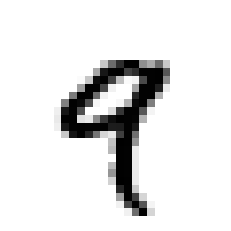

label:  9


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = X_train[4]
label = y_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print('label: ', label)

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_test_5)

[False False False ... False  True False]


In [11]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

In [9]:
X_train[0][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [17]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='softmax'))

model.compile(loss = 'binary_crossentropy', #'mse'
             optimizer = 'sgd',
             metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 26,209
Trainable params: 26,209
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(X_train, y_train_5, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 5s 87us/step - loss: 0.1553 - acc: 0.9455


In [19]:
loss, acc = model.evaluate(X_train, y_train_5, verbose=0)
print(loss)
print(acc)

0.09486245704069733
0.9688833333333333


In [20]:
from tensorflow.keras.utils import to_categorical

y_pred_5 = model.predict(X_test).ravel()
y_pred_5 = y_pred_5 > 0.5
print(y_pred_5)
print(y_test_5)

[False False False ... False  True False]
[False False False ... False  True False]


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_pred_5) # pred는 value로 전달
print(cm)

[[9067   41]
 [ 250  642]]


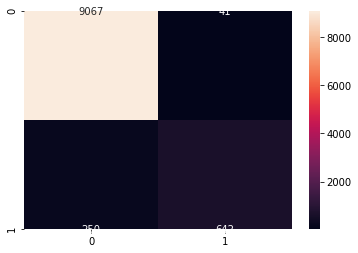

In [29]:
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')

In [30]:
import numpy as np

y_pred_5 = model.predict(X_test).ravel()

print(y_pred_5)
print(y_test_5)

[1.3543367e-03 8.4580839e-02 1.3147503e-02 ... 6.6350400e-03 6.6773313e-01
 1.1643767e-04]
[False False False ... False  True False]


[0.09705146 0.09695321 0.09696376 ... 1.         1.         1.        ]
[1.         0.99887892 0.99887892 ... 0.00224215 0.00112108 0.        ]
[6.9051981e-05 6.9230795e-05 6.9737434e-05 ... 9.8110878e-01 9.8134279e-01
 9.8401046e-01]
9085
9085
9084
10000


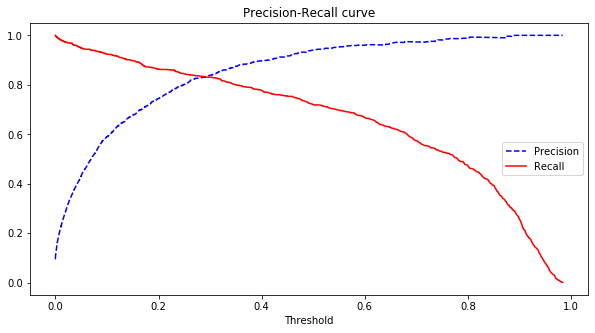

In [31]:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_pred_5) # pred 인자는 score(probability) 값으로 전달
print(precisions)
print(recalls)
print(thresholds)
print(len(precisions))
print(len(recalls))
print(len(thresholds))
print(len(y_test_5))

plt.figure(figsize=(10,5))
plt.title('Precision-Recall curve')
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()